In [137]:
import numpy as np
from sklearn.covariance import fast_mcd
import matplotlib.pyplot as plt


# 1. Generate Dummy Data with Outliers
rng = np.random.RandomState(42) # for reproducibility
n_samples = 200
n_outliers = 25
n_features = 2

# Generate inlier data (majority of data)
data = rng.randn(n_samples, n_features)
inlier_covariance = np.eye(n_features) * 2  # Identity matrix scaled
inlier_mean = np.zeros(n_features)
inliers = np.dot(rng.randn(n_samples, n_features), inlier_covariance) + inlier_mean
data[:n_samples] = inliers

# Add outliers (making them distinct in feature space)
outlier_covariance = np.diag([5, 0.1]) # Elongated ellipse
outlier_mean = [5, 5]
outliers = np.dot(rng.randn(n_outliers, n_features), outlier_covariance) + outlier_mean
data = np.concatenate([data,outliers])

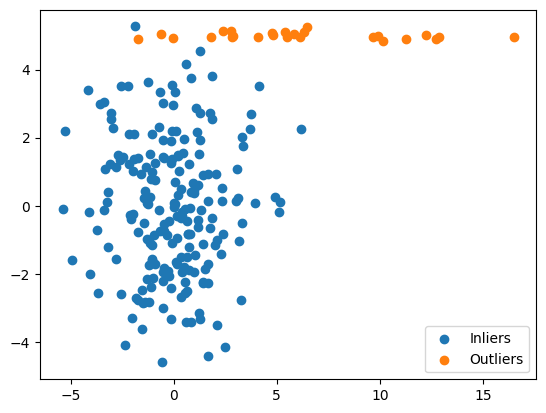

In [126]:
## Plotting the points
plt.scatter(*zip(*inliers))
plt.scatter(*zip(*outliers))
plt.legend(['Inliers','Outliers'])

In [127]:
# 2. Apply FastMCD
fast_mcd_model = fast_mcd(data,random_state=rng, support_fraction=0.9) # support_fraction: roughly expect 30% outliers

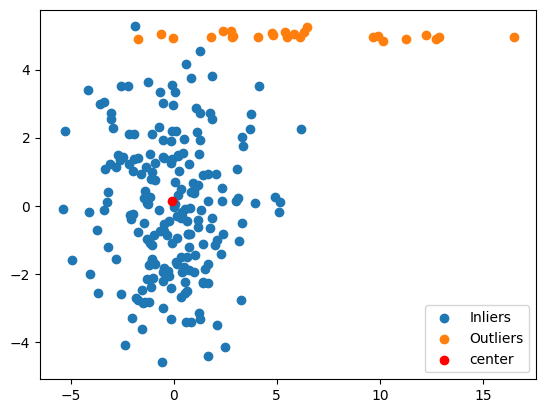

In [128]:
## plotting the center of fast mcd
plt.scatter(*zip(*inliers))
plt.scatter(*zip(*outliers))
plt.scatter(*zip(fast_mcd_model[0]), color='red')
plt.legend(['Inliers','Outliers','center'])

In [129]:
## Filtering points 
good = [v for b, v in zip(fast_mcd_model[2], data) if b]
bad = [v for b, v in zip(fast_mcd_model[2], data) if not b]

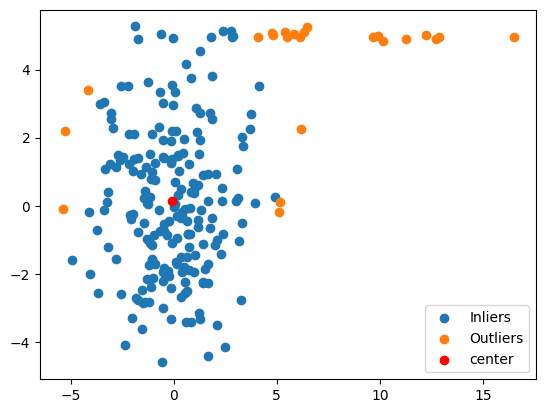

In [130]:
## plotting the good and bad/outliers
plt.scatter(*zip(*good))
plt.scatter(*zip(*bad))
plt.scatter(*zip(fast_mcd_model[0]), color='red')
plt.legend(['Inliers','Outliers','center'])

In [136]:
# Example of trying different support_fraction values
support_fractions = [0.5, 0.6, 0.7, 0.8]
for fraction in support_fractions:
    fast_mcd_hp = fast_mcd(data, support_fraction=fraction, random_state=42)
    n_outliers = np.sum(~fast_mcd_hp[2])
    print(f"Support Fraction: {fraction}, Number of Outliers Detected: {n_outliers}")

Support Fraction: 0.5, Number of Outliers Detected: 113
Support Fraction: 0.6, Number of Outliers Detected: 90
Support Fraction: 0.7, Number of Outliers Detected: 68
Support Fraction: 0.8, Number of Outliers Detected: 45


In [133]:
# Let's assume 'true_outlier_labels' is a boolean array: True for actual outliers, False for inliers
true_outlier_labels = np.array([True] * n_samples + [False] * n_outliers) # Based on how we generated data
predicted_outlier_labels = fast_mcd_model[2] # FastMCD's outlier predictions

from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

cm = confusion_matrix(true_outlier_labels, predicted_outlier_labels)
precision = precision_score(true_outlier_labels, predicted_outlier_labels)
recall = recall_score(true_outlier_labels, predicted_outlier_labels)
f1 = f1_score(true_outlier_labels, predicted_outlier_labels)
accuracy = accuracy_score(true_outlier_labels, predicted_outlier_labels)

print("\n--- Evaluation Metrics (assuming ground truth) ---")
print("Confusion Matrix:\n", cm)
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-Score: {f1:.3f}")
print(f"Accuracy: {accuracy:.3f}")


--- Evaluation Metrics (assuming ground truth) ---
Confusion Matrix:
 [[ 17   8]
 [  6 194]]
Precision: 0.960
Recall: 0.970
F1-Score: 0.965
Accuracy: 0.938


In [ ]:
#Test flask api
import json
import requests
import json

r = requests.post('http://127.0.0.1:5000/detect_outliers',data=json.dumps({"features":data.tolist()})) #json.dumps(transactions))
r.text